In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import wilcoxon

# comparison to other benchmarks

## Estimated moral graph

In [2]:
hdbu = pd.read_csv('./comparison to other benchmarks/1-30/EqVarDAG-HD-BU_results_1_30.csv')
td = pd.read_csv('./comparison to other benchmarks/1-30/EqVarDAG-TD_results_1_30.csv')
misocp_est = pd.read_csv('./comparison to other benchmarks/1-30/MISOCP_est_12log(m)n_1_30.csv')
ges_est = pd.read_csv('./comparison to other benchmarks/1-30/ges_results_est_default_1_30.csv')
micodag_est = pd.read_csv('./comparison to other benchmarks/1-30/MICP-NID-Perspective_est_12log(m)n_1_30.csv')

pc_est = pd.read_csv('./comparison to other benchmarks/1-30/pc_results_est_1_30.csv')
gsp_est = pd.read_csv('./comparison to other benchmarks/1-30/GSP_results_est_moral_1_30.csv')

In [3]:
networks = ['1dsep', '2asia', '3bowling',
       '4insuranceSmall', '5rain', '6cloud', '7funnel', '8galaxy',
       '9insurance', '10factors', '11hfinder', '12hepar']

In [4]:
hdbu.set_index("network", inplace=True)
td.set_index("network", inplace=True)
misocp_est.set_index("network", inplace=True)
ges_est.set_index("network", inplace=True)
micodag_est.set_index("network", inplace=True)
pc_est.set_index("network", inplace=True)
gsp_est.set_index("network", inplace=True)

In [5]:
micodag_est.head()

,k,RGAP,d_cpdag,SHDs,TPR,FPR,Time
network,,,,,,,
1dsep,1,0.000000,2,1,0.833333,0.0,0.136481
1dsep,2,0.000000,2,1,0.833333,0.0,0.165314
1dsep,3,0.000011,2,1,0.833333,0.0,0.353693
1dsep,4,0.000000,2,1,0.833333,0.0,0.222622
1dsep,5,0.000000,2,1,0.833333,0.0,0.262175


In [6]:
misocp_est.columns

Index(['p', 'n', 'k', 'Time', 'RGAP', 'd_cpdag', 'SHDs', 'TPR', 'FPR'], dtype='object')

In [7]:
hdbu_mean = hdbu.groupby('network').mean().loc[networks]
td_mean = td.groupby('network').mean().loc[networks]
misocp_est_mean = misocp_est.groupby('network').mean().loc[networks]
ges_est_mean = ges_est.groupby('network').mean().loc[networks]
micodag_est_mean = micodag_est.groupby('network').mean().loc[networks]
pc_est_mean = pc_est.groupby('network').mean().loc[networks]
gsp_est_mean = gsp_est.groupby('network').mean().loc[networks]

hdbu_std = hdbu.groupby('network')['d_cpdag'].std().loc[networks]
td_std = td.groupby('network')['d_cpdag'].std().loc[networks]
misocp_est_std = misocp_est.groupby('network')['d_cpdag'].std().loc[networks]
ges_est_std = ges_est.groupby('network')['d_cpdag'].std().loc[networks]
micodag_est_std = micodag_est.groupby('network')['d_cpdag'].std().loc[networks]
pc_est_std = pc_est.groupby('network')['d_cpdag'].std().loc[networks]
gsp_est_std = gsp_est.groupby('network')['d_cpdag'].std().loc[networks]

hdbu_combined = pd.DataFrame({
    'time': hdbu_mean['time'].round(1),
    'mean_d_cpdag': hdbu_mean['d_cpdag'].round(1),
    'std_d_cpdag': hdbu_std.round(1)
})

td_combined = pd.DataFrame({
    'time': td_mean['time'].round(1),
    'mean_d_cpdag': td_mean['d_cpdag'].round(1),
    'std_d_cpdag': td_std.round(1)
})

misocp_est_combined = pd.DataFrame({
    'time': misocp_est_mean['Time'].round(),
    'RGAP': misocp_est_mean['RGAP'].round(2),
    'mean_d_cpdag': misocp_est_mean['d_cpdag'].round(1),
    'std_d_cpdag': misocp_est_std.round(1)
})

ges_est_combined = pd.DataFrame({
    'time': ges_est_mean['time'].round(),
    'mean_d_cpdag': ges_est_mean['d_cpdag'].round(1),
    'std_d_cpdag': ges_est_std.round(1)
})

micodag_est_combined = pd.DataFrame({
    'time': micodag_est_mean['Time'].round(),
    'RGAP': micodag_est_mean['RGAP'].round(2),
    'mean_d_cpdag': micodag_est_mean['d_cpdag'].round(1),
    'std_d_cpdag': micodag_est_std.round(1)
})

pc_est_combined = pd.DataFrame({
    'time': pc_est_mean['time'].round(),
    'mean_d_cpdag': pc_est_mean['d_cpdag'].round(1),
    'std_d_cpdag': pc_est_std.round(1)
})

gsp_est_combined = pd.DataFrame({
    'time': gsp_est_mean['Time'].round(),
    'mean_d_cpdag': gsp_est_mean['d_cpdag'].round(1),
    'std_d_cpdag': gsp_est_std.round(1)
})

# hdbu_combined = hdbu_combined.loc[networks]
# td_combined = td_combined.loc[networks]
# misocp_est_combined = misocp_est_combined.loc[networks]
# ges_est_combined = ges_est_combined.loc[networks]
# micodag_est_combined = micodag_est_combined.loc[networks]


In [8]:
print(hdbu_combined)
print(td_combined)
print(misocp_est_combined)
print(ges_est_combined)
print(micodag_est_combined)

                 time  mean_d_cpdag  std_d_cpdag
network                                         
1dsep             0.1           9.2          4.4
2asia             0.1          20.7          4.8
3bowling          0.1           5.6          2.6
4insuranceSmall   0.2          39.9          7.1
5rain             0.2          16.7          3.8
6cloud            0.2          43.8          7.8
7funnel           0.3          15.9          3.0
8galaxy           0.3          44.2          3.9
9insurance        0.6          43.8          6.6
10factors         0.6          26.1          5.8
11hfinder         3.5         132.6         19.5
12hepar           6.6         133.6         12.7
                 time  mean_d_cpdag  std_d_cpdag
network                                         
1dsep             0.0           2.0          0.2
2asia             0.0          11.6          3.1
3bowling          0.0           7.0          2.1
4insuranceSmall   0.0          12.4          4.9
5rain             0.

In [9]:
print(pc_est_combined)
print(gsp_est_combined)


                 time  mean_d_cpdag  std_d_cpdag
network                                         
1dsep             0.0           5.0          0.0
2asia             0.0           9.1          0.4
3bowling          0.0          14.7          1.1
4insuranceSmall   0.0          34.6          1.3
5rain             0.0          17.1          1.8
6cloud            0.0          23.2          3.3
7funnel           0.0          21.3          0.7
8galaxy           0.0          29.7          1.0
9insurance        0.0          72.9          3.0
10factors         0.0          94.6          3.1
11hfinder        32.0          91.7          5.2
12hepar           1.0         138.2          6.2
                 time  mean_d_cpdag  std_d_cpdag
network                                         
1dsep             0.0           2.0          0.0
2asia             0.0           5.2          2.1
3bowling          0.0           5.8          3.2
4insuranceSmall   0.0          18.3          5.1
5rain             0.

In [10]:
hdbu_extra = hdbu_mean[['SHDs', 'TPR', 'FPR']].round(3)
hdbu_extra.iloc[:,0] = hdbu_extra.iloc[:,0].round(1)
print(hdbu_extra[['SHDs', 'TPR', 'FPR']])


td_extra = td_mean[['SHDs', 'TPR', 'FPR']].round(3)
td_extra.iloc[:, 0] = td_extra.iloc[:, 0].round(1)
print(td_extra[['SHDs', 'TPR', 'FPR']])


misocp_est_extra = misocp_est_mean[['SHDs', 'TPR', 'FPR']].round(3)
misocp_est_extra.iloc[:, 0] = misocp_est_extra.iloc[:, 0].round(1)
print(misocp_est_extra[['SHDs', 'TPR', 'FPR']])


ges_est_extra = ges_est_mean[['SHDs', 'TPR', 'FPR']].round(3)
ges_est_extra.iloc[:, 0] = ges_est_extra.iloc[:, 0].round(1)
print(ges_est_extra[['SHDs', 'TPR', 'FPR']])


micodag_est_extra = micodag_est_mean[['SHDs', 'TPR', 'FPR']].round(3)
micodag_est_extra.iloc[:, 0] = micodag_est_extra.iloc[:, 0].round(1)
print(micodag_est_extra[['SHDs', 'TPR', 'FPR']])


                 SHDs    TPR    FPR
network                            
1dsep             3.9  0.983  0.126
2asia            11.8  0.900  0.197
3bowling          3.2  0.918  0.033
4insuranceSmall  21.8  0.968  0.105
5rain             9.2  0.948  0.047
6cloud           20.7  0.930  0.082
7funnel          10.0  0.946  0.030
8galaxy          24.1  0.958  0.061
9insurance       25.2  0.986  0.036
10factors        11.1  0.966  0.013
11hfinder        87.8  0.973  0.028
12hepar          91.7  0.983  0.019
                 SHDs    TPR    FPR
network                            
1dsep             1.0  0.833  0.001
2asia             4.9  0.862  0.067
3bowling          2.3  0.909  0.018
4insuranceSmall   3.6  0.948  0.012
5rain             1.4  0.944  0.002
6cloud            6.8  0.925  0.023
7funnel           1.1  0.944  0.000
8galaxy          10.0  0.953  0.024
9insurance       18.3  0.946  0.023
10factors        21.4  0.775  0.009
11hfinder        30.2  0.922  0.008
12hepar          40.9  0.849

## boxplot for these results

In [9]:
networks = ['1dsep', '2asia', '3bowling',
       '4insuranceSmall', '5rain', '6cloud', '7funnel', '8galaxy',
       '9insurance','10factors', '11hfinder', '12hepar']
networks_r = ['dsep', 'asia', 'bowling',
       'insuranceSmall', 'rain', 'cloud', 'funnel', 'galaxy',
       'insurance','factors', 'hfinder', 'hepar2']
network_sizes = [6,8,9,15,14,16,18,20,27,27,56,70]
network_dict_size = dict(zip(networks, network_sizes))
network_dict_name = dict(zip(networks, networks_r))

In [10]:
df_combined = pd.concat([
    # pd.DataFrame({'network': hdbu.index, 'd_cpdag': hdbu['d_cpdag'], 'method': 'EqVarDAG-HD-BU'}),
    # pd.DataFrame({'network': td.index, 'd_cpdag': td['d_cpdag'], 'method': 'EqVarDAG-TD'}),
    # pd.DataFrame({'network': misocp_est.index, 'd_cpdag': misocp_est['d_cpdag'], 'method': 'MISOCP'}),
    pd.DataFrame({'network': ges_est.index,'d_cpdag': ges_est['d_cpdag'], 'method': 'GES'}),
    pd.DataFrame({'network': micodag_est.index, 'd_cpdag': micodag_est['d_cpdag'], 'method': 'Our method'})
], ignore_index=True)
df_combined['m'] = df_combined['network'].map(network_dict_size)
df_combined['network'] = df_combined['network'].map(network_dict_name)


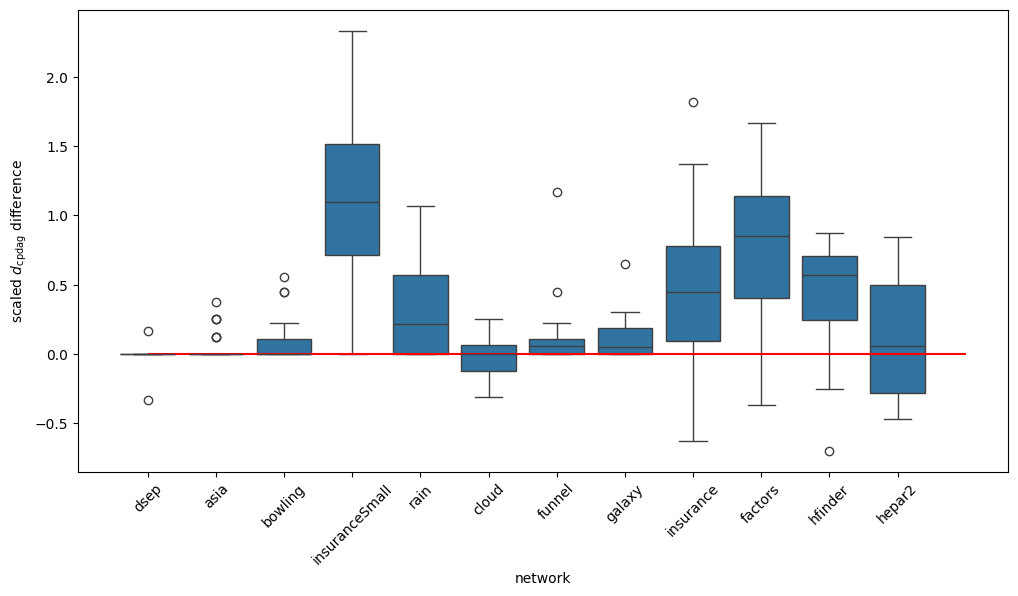

In [13]:
cpdag_diff = ges_est.d_cpdag - micodag_est.d_cpdag   
cpdag_diff = cpdag_diff.reset_index()
cpdag_diff['m'] = cpdag_diff['network'].map(network_dict_size)
cpdag_diff['network'] = cpdag_diff['network'].map(network_dict_name)
F_box = plt.figure(figsize=(12, 6))
b3 = sns.boxplot(x=cpdag_diff['network'],
            y=cpdag_diff['d_cpdag']/cpdag_diff['m'],
            order = networks_r)
b3.set(ylabel=r"scaled $d_\mathrm{cpdag}$ difference")
plt.xticks(rotation=45) 
# plt.legend(loc='best', bbox_to_anchor=(0.24, 0.62))
plt.hlines(y=0, xmin=0, xmax=12,color='r')
plt.show()
# F_box.savefig("./comparison to other benchmarks/1-30/comparison_with_ges_boxplot_individual.pdf", bbox_inches='tight')

In [39]:
p_values = []
for network in networks:
    test = wilcoxon(ges_est.loc[network].d_cpdag, micodag_est.loc[network].d_cpdag, alternative = "greater")
    p_values.append(test[1])

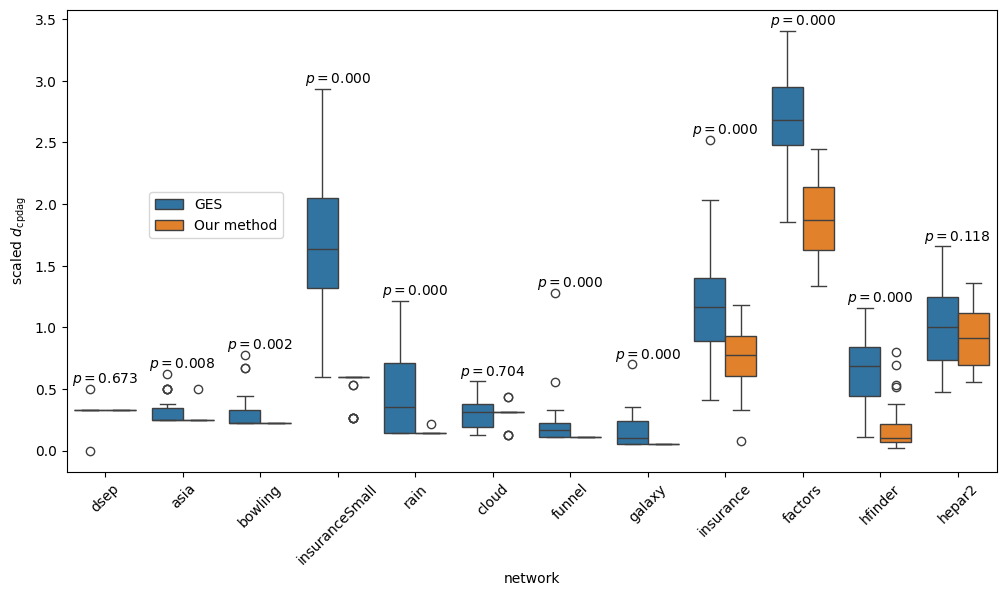

In [49]:
F_box = plt.figure(figsize=(12, 6))
b3 = sns.boxplot(x=df_combined['network'],
            y=df_combined['d_cpdag']/df_combined['m'],
            hue=df_combined['method'], order = networks_r)
b3.set(ylabel=r"scaled $d_\mathrm{cpdag}$")

plt.xticks(rotation=45) 
plt.legend(loc='best', bbox_to_anchor=(0.24, 0.62))


for i, network in enumerate(networks_r):
    y_max = df_combined[df_combined['network'] == network]['d_cpdag'].max() / df_combined[df_combined['network'] == network]['m'].max()
    h = 0.05  # Height of the annotation line
    x1, x2 = i - 0.2, i + 0.2
    # plt.plot([x1, x1, x2, x2], [y_max + h, y_max + 2 * h, y_max + 2 * h, y_max + h], lw=1.5, color='r')
    plt.text((x1 + x2) / 2, y_max + h, f'$p = {p_values[i]:.3f}$', ha='center')


plt.show()
F_box.savefig("./comparison to other benchmarks/1-30/comparison_with_ges_boxplot.pdf", bbox_inches='tight')

In [19]:
micodag_est.groupby('network')['d_cpdag'].quantile([0.25, 0.5, 0.75]).unstack()

,0.25,0.50,0.75
network,,,
10factors,44.00,50.5,57.75
11hfinder,4.00,5.5,12.00
12hepar,48.75,64.0,78.25
1dsep,2.00,2.0,2.00
2asia,2.00,2.0,2.00
3bowling,2.00,2.0,2.00
4insuranceSmall,9.00,9.0,9.00
5rain,2.00,2.0,2.00
6cloud,5.00,5.0,5.00


In [18]:
ges_est.groupby('network')['d_cpdag'].quantile([0.25, 0.5, 0.75]).unstack()

,0.25,0.50,0.75
network,,,
10factors,67.00,72.5,79.75
11hfinder,24.75,38.5,47.00
12hepar,51.25,70.0,87.50
1dsep,2.00,2.0,2.00
2asia,2.00,2.0,2.75
3bowling,2.00,2.0,3.00
4insuranceSmall,19.75,24.5,30.75
5rain,2.00,5.0,10.00
6cloud,3.00,5.0,6.00


## true moral graph

In [3]:
misocp_true = pd.read_csv('./comparison to other benchmarks/1-30/MISOCP_true_12log(m)n_1_30.csv')
ges_true = pd.read_csv('./comparison to other benchmarks/1-30/ges_results_true_default_1_30.csv')
micodag_true = pd.read_csv('./comparison to other benchmarks/1-30/MICP-NID-Perspective_true_12log(m)n_1_30.csv')

In [4]:
misocp_true.set_index("network", inplace=True)
ges_true.set_index("network", inplace=True)
micodag_true.set_index("network", inplace=True)

In [159]:
misocp_true_mean = misocp_true.groupby('network').mean().loc[networks]
ges_true_mean = ges_true.groupby('network').mean().loc[networks]
micodag_true_mean = micodag_true.groupby('network').mean().loc[networks]


misocp_true_std = misocp_true.groupby('network')['d_cpdag'].std().loc[networks]
ges_true_std = ges_true.groupby('network')['d_cpdag'].std().loc[networks]
micodag_true_std = micodag_true.groupby('network')['d_cpdag'].std().loc[networks]


misocp_true_combined = pd.DataFrame({
    'time': misocp_true_mean['Time'].round(),
    'RGAP': misocp_true_mean['RGAP'].round(2),
    'mean_d_cpdag': misocp_true_mean['d_cpdag'].round(1),
    'std_d_cpdag': misocp_true_std.round(1)
})

ges_true_combined = pd.DataFrame({
    'time': ges_true_mean['time'].round(),
    'mean_d_cpdag': ges_true_mean['d_cpdag'].round(1),
    'std_d_cpdag': ges_true_std.round(1)
})

micodag_true_combined = pd.DataFrame({
    'time': micodag_true_mean['Time'].round(),
    'RGAP': micodag_true_mean['RGAP'].round(2),
    'mean_d_cpdag': micodag_true_mean['d_cpdag'].round(1),
    'std_d_cpdag': micodag_true_std.round(1)
})

In [160]:
print(misocp_true_combined)
print(ges_true_combined)
print(micodag_true_combined)

                   time  RGAP  mean_d_cpdag  std_d_cpdag
network                                                 
1dsep               0.0  0.00           2.0          0.0
2asia               0.0  0.00          10.9          2.0
3bowling            0.0  0.00           4.1          2.3
4insuranceSmall     5.0  0.00           8.0          0.0
5rain               1.0  0.00           2.0          0.0
6cloud              1.0  0.00          19.5          1.5
7funnel             1.0  0.00           2.0          0.0
8galaxy             1.0  0.00           6.2          5.2
9insurance        588.0  0.00          14.1          3.4
10factors        1328.0  0.02          33.7          5.4
11hfinder        2800.0  0.04           8.6          6.1
12hepar          3500.0  0.06          29.9         11.9
                 time  mean_d_cpdag  std_d_cpdag
network                                         
1dsep             0.0           1.9          0.4
2asia             0.0           2.1          0.6
3bowli

In [161]:
misocp_true_extra = misocp_true_mean[['SHDs', 'TPR', 'FPR']].round(3)
misocp_true_extra.iloc[:, 0] = misocp_true_extra.iloc[:, 0].round(1)
print(misocp_true_extra[['SHDs', 'TPR', 'FPR']])


ges_true_extra = ges_true_mean[['SHDs', 'TPR', 'FPR']].round(3)
ges_true_extra.iloc[:, 0] = ges_true_extra.iloc[:, 0].round(1)
print(ges_true_extra[['SHDs', 'TPR', 'FPR']])


micodag_true_extra = micodag_true_mean[['SHDs', 'TPR', 'FPR']].round(3)
micodag_true_extra.iloc[:, 0] = micodag_true_extra.iloc[:, 0].round(1)
print(micodag_true_extra[['SHDs', 'TPR', 'FPR']])

                 SHDs    TPR    FPR
network                            
1dsep             1.0  0.833  0.000
2asia             2.6  0.854  0.223
3bowling          1.5  0.909  0.083
4insuranceSmall   1.0  0.960  0.006
5rain             1.0  0.944  0.037
6cloud            2.3  0.933  0.072
7funnel           1.0  0.944  0.000
8galaxy           2.4  0.952  0.022
9insurance        3.3  0.963  0.010
10factors        15.9  0.825  0.033
11hfinder         3.2  0.975  0.004
12hepar           8.8  0.967  0.005
                 SHDs    TPR    FPR
network                            
1dsep             1.0  0.862  0.032
2asia             1.0  0.815  0.001
3bowling          1.1  0.909  0.020
4insuranceSmall   7.0  0.553  0.041
5rain             1.9  0.867  0.009
6cloud            1.0  0.897  0.001
7funnel           1.4  0.894  0.003
8galaxy           1.1  0.949  0.001
9insurance        5.0  0.756  0.014
10factors        14.6  0.526  0.029
11hfinder         4.2  0.935  0.003
12hepar          11.7  0.890

# Box plots - Variance difference, estimated moral graphs

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

num_edges = [8, 12, 16, 24, 39, 51, 64]

In [6]:
pd.read_csv("./variance difference level/1-30/EqVarDAG-HD-BU_alpha_results_1_30.csv")

,network,alpha,instance,time,d_cpdag,SHD,SHDs,TPR,FPR
0,10,1,1,1.302139,6,4,4,1.0000,0.043478
1,10,1,2,0.083607,7,5,3,1.0000,0.032609
2,10,1,3,0.079000,7,5,5,1.0000,0.054348
3,10,1,4,0.085341,14,10,6,1.0000,0.065217
4,10,1,5,0.072913,5,4,3,1.0000,0.032609
...,...,...,...,...,...,...,...,...,...
265,20,4,26,0.204013,21,16,11,1.0000,0.028646
266,20,4,27,0.215013,20,13,9,0.9375,0.020833
267,20,4,28,0.207053,26,15,12,0.9375,0.028646
268,20,4,29,0.213237,23,15,12,0.9375,0.028646


In [14]:
# box plots of alpha tests
alpha_edges = [8, 12, 16]
## names = ["m", "n", "alpha", "k", "Time", "RGAP", "d_cpdag", "SHDs", "TPR", "FPR"]
MISOCP_results = pd.read_csv("./variance difference level/1-30/MISOCP_alpha_results_4log(m)_1_30.csv")[['m', 'alpha', 'k', 'd_cpdag', 'Time']]
MICP_NID_results = pd.read_csv("./variance difference level/1-30/micodag_alpha_results_4log(m)n_1_30.csv")[['m', 'alpha', 'k', 'd_cpdag', 'Time']]
BU_results = pd.read_csv("./variance difference level/1-30/EqVarDAG-HD-BU_alpha_results_1_30.csv")[['m', 'alpha', 'k', 'd_cpdag', 'Time']]
TD_results = pd.read_csv("./variance difference level/1-30/EqVarDAG-TD_alpha_results_1_30.csv")[['m', 'alpha', 'k', 'd_cpdag', 'Time']]
GES_results = pd.read_csv("./variance difference level/1-30/ges_alpha_results_1_30.csv")[['m', 'alpha', 'k', 'd_cpdag', 'Time']]
gsp_results = pd.read_csv("./variance difference level/1-30/GSP_alpha_results_est_moral_1_30.csv")[['m', 'alpha', 'k', 'd_cpdag', 'Time']]

BU_results['Method'] = "HD-BU"
gsp_results['Method'] = "GSP"
TD_results['Method'] = "TD"
MISOCP_results['Method'] = "MISOCP"
MICP_NID_results['Method'] = "Our method"
GES_results['Method'] = "GES"


all_results = pd.concat([BU_results, gsp_results, TD_results, MISOCP_results, GES_results, MICP_NID_results])
# all_SHDs = all_results[['m', 'tau', 'SHDs']]
all_cpdag = all_results[['m', 'alpha', 'k', 'd_cpdag', 'Method', 'Time']]
all_cpdag.columns = ['m', '$\\rho$', 'k', 'd_cpdag', 'Method', 'Time']
all_cpdag.head()

,m,$\rho$,k,d_cpdag,Method,Time
0,10,1,1,6,HD-BU,0.255472
1,10,1,2,7,HD-BU,0.074697
2,10,1,3,7,HD-BU,0.080892
3,10,1,4,14,HD-BU,0.080056
4,10,1,5,5,HD-BU,0.074644


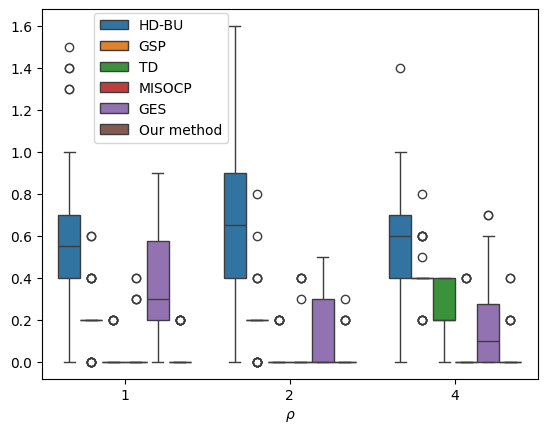

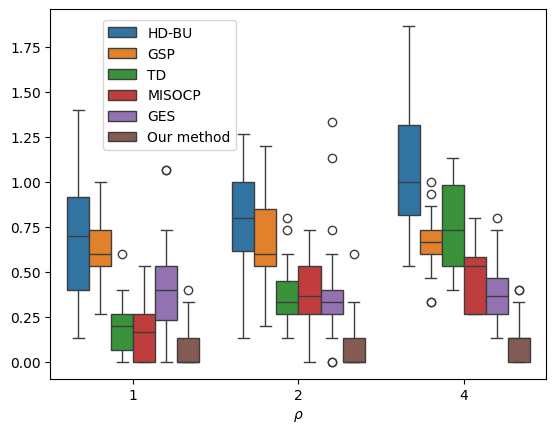

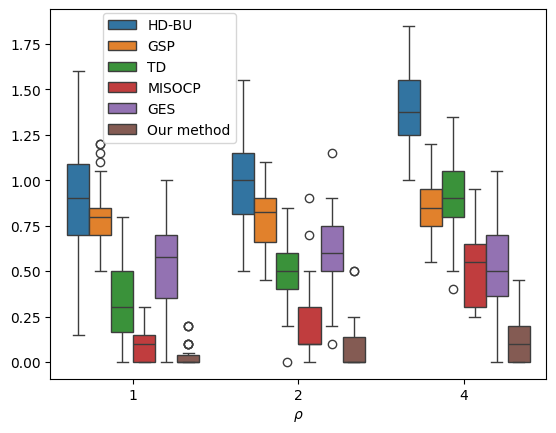

In [15]:


F3 = plt.figure()
all_cpdag_10 = all_cpdag[all_cpdag.m == 10]
b3 = sns.boxplot(x=all_cpdag_10['$\\rho$'],
            y=all_cpdag_10['d_cpdag']/all_cpdag_10['m'],
            hue=all_cpdag_10['Method'])
b3.set(ylabel="")
plt.legend(loc='best', bbox_to_anchor=(0.24, 0.62))
plt.show()
F3.savefig("./variance difference level/1-30/alpha_test_m10_d_cpdag_4log(m)n.pdf", bbox_inches='tight')

F4 = plt.figure()
all_cpdag_15 = all_cpdag[all_cpdag.m == 15]
b4 = sns.boxplot(x=all_cpdag_15['$\\rho$'],
            y=all_cpdag_15['d_cpdag']/all_cpdag_15['m'],
            hue=all_cpdag_15['Method'])
b4.set(ylabel="")
plt.legend(loc='best', bbox_to_anchor=(0.24, 0.6))
plt.show()
F4.savefig("./variance difference level/1-30/alpha_test_m15_d_cpdag_4log(m)n.pdf", bbox_inches='tight')

F5 = plt.figure()
all_cpdag_20 = all_cpdag[all_cpdag.m == 20]
b5 = sns.boxplot(x=all_cpdag_20['$\\rho$'],
            y=all_cpdag_20['d_cpdag']/all_cpdag_20['m'],
            hue=all_cpdag_20['Method'])
b5.set(ylabel="")
plt.legend(loc='best', bbox_to_anchor=(0.24, 0.62))
plt.show()
F5.savefig("./variance difference level/1-30/alpha_test_m20_d_cpdag_4log(m)n.pdf", bbox_inches='tight')

In [4]:
all_cpdag = all_cpdag.set_index(['m', '$\\alpha$','Method'])

In [58]:

alpha_mean_results = all_cpdag.groupby(level=['m', '$\\alpha$','Method'], group_keys=True)['d_cpdag'].mean().round(1)
alpha_mean_results.unstack(level='Method')

Method        GES   GSP  HD-BU  MISOCP  Our method    TD
m  $\alpha$                                             
10 1          3.4   2.1    6.3     0.6         0.5   0.4
   2          1.6   2.1    7.1     0.6         0.4   0.4
   4          1.7   4.2    5.7     0.5         0.5   2.4
15 1          6.4   9.6   10.3     2.7         1.3   3.0
   2          5.7  10.1   11.7     5.6         1.3   5.5
   4          6.0   9.9   16.4     7.4         1.8  11.6
20 1         11.1  16.1   17.9     1.9         0.7   6.7
   2         12.0  16.0   20.2     4.3         1.6   9.9
   4         10.5  17.3   28.1    10.2         2.6  17.8

In [5]:
alpha_std_results = all_cpdag.groupby(level=['m', '$\\alpha$','Method'], group_keys=True)['d_cpdag'].std().round(1)
alpha_std_results.unstack(level='Method')

Method       GES  GSP  HD-BU  MISOCP  Our method   TD
m  $\alpha$                                          
10 1         2.7  1.7    4.1     1.3         0.9  0.8
   2         1.9  1.8    4.0     1.4         0.9  0.8
   4         2.2  1.4    3.2     1.4         1.2  1.2
15 1         3.9  2.5    4.8     2.5         1.9  2.4
   2         4.3  3.3    4.3     2.9         2.0  2.6
   4         2.7  2.3    5.9     2.8         1.9  3.3
20 1         5.3  3.8    6.7     1.8         1.3  4.3
   2         4.7  3.1    5.3     4.5         2.8  3.7
   4         5.5  3.4    4.7     3.9         3.2  4.4

In [57]:
all_cpdag.groupby(level=['m', '$\\alpha$','Method'], group_keys=True)['Time'].mean().round(2).unstack(level='Method')

Method        GES   GSP  HD-BU  MISOCP  Our method    TD
m  $\alpha$                                             
10 1         0.01  0.01   0.09    0.06        0.79  0.00
   2         0.00  0.01   0.08    0.06       17.57  0.00
   4         0.00  0.01   0.08    0.05       34.23  0.00
15 1         0.00  0.01   0.14    0.12       22.57  0.01
   2         0.00  0.01   0.13    0.12       16.01  0.01
   4         0.01  0.01   0.13    0.10       12.63  0.00
20 1         0.00  0.01   0.21    0.21      136.01  0.01
   2         0.01  0.01   0.21    0.25      197.23  0.01
   4         0.00  0.01   0.22    0.22      184.98  0.02

# Early stopping

,m,n,k,tau,Time,GAP,RGAP,d_cpdag,SHDs,TPR,FPR
0,10,400,2,0,0.496939,0.000004,4.550000e-07,0,0,1,0.000000
1,10,400,3,0,0.352977,0.000420,4.360000e-05,0,0,1,0.000000
2,10,400,4,0,0.933220,0.000563,6.160000e-05,0,0,1,0.000000
3,10,400,5,0,1.005873,0.000312,3.230000e-05,0,0,1,0.000000
4,10,400,6,0,0.406475,0.000164,1.720000e-05,0,0,1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
59,30,400,1,0,1500.005763,2.828565,1.025035e-01,5,1,1,0.002433
60,30,400,2,0,1038.853093,0.001945,7.110000e-05,7,2,1,0.004866
61,30,400,3,0,1500.009583,1.459155,5.347243e-02,0,0,1,0.000000
62,30,400,4,0,1500.155713,1.347558,4.974067e-02,0,0,1,0.000000


In [22]:
synthetic_data_edges = [8, 16, 24, 39]
names = ["m", "n", "k", "tau", "Time", "GAP", "RGAP", "d_cpdag", "SHDs", "TPR", "FPR"]
results = pd.read_csv("./early stopping/1-30/early_stopping_results_n400_0_log(m)n_1_30.csv")
results.columns = names
results = results[results.m.isin([15, 20, 25, 30])]
results_df = pd.DataFrame(results)
results_df['$tau$'] = "0"

results_early = pd.read_csv("./early stopping/1-30/early_stopping_results_n400_early_log(m)n_1_30.csv")
results_early.columns = names
results_early_df = pd.DataFrame(results_early)
results_early_df['$tau$'] = r"$\bar{s} \lambda^2$"

results_too_early = pd.read_csv("./early stopping/1-30/early_stopping_results_n400_too_early_log(m)n_1_30.csv")
results_too_early.columns = names
results_too_early_df = pd.DataFrame(results_too_early)
results_too_early_df['$tau$'] = r"$m\bar{s} \lambda^2$"

all_results_df = pd.concat([results_df, results_early_df, results_too_early_df])
all_SHDs_df = all_results_df[['m', '$tau$', 'SHDs', 'Time']]
all_cpdag_df = all_results_df[['m', '$tau$', 'd_cpdag', 'Time']]


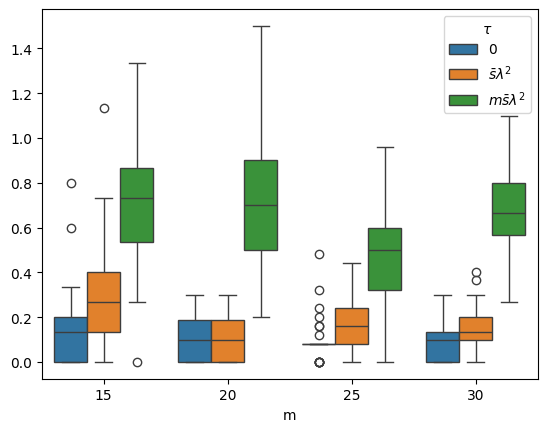

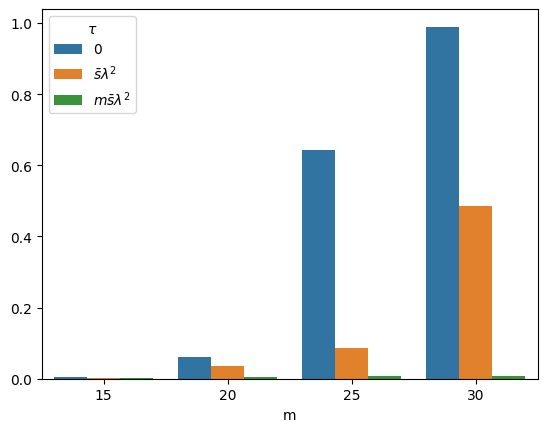

In [23]:

# F1 = plt.figure()
# b1 = sns.boxplot(x=all_SHDs_df['m'],
#             y=all_SHDs_df['SHDs']/all_SHDs_df['m'],
#             hue=all_SHDs_df['$tau$'])
# b1.set(ylabel="")
# plt.legend(title=r'$\tau$')
# plt.show()
# F1.savefig("early_stopping_0_early_SHDs_log(m)n.pdf", bbox_inches='tight')

F2 = plt.figure()
b2 = sns.boxplot(x=all_cpdag_df['m'],
            y=all_cpdag_df['d_cpdag']/all_cpdag_df['m'],
            hue=all_cpdag_df['$tau$'])
b2.set(ylabel="")
plt.legend(title=r'$\tau$')
plt.show()
F2.savefig("./early stopping/1-30/early_stopping_0_early_d_cpdag_log(m)n.pdf", bbox_inches='tight')


F3 = plt.figure()
b3 = sns.barplot(x=all_cpdag_df['m'], y=all_cpdag_df['Time']/(all_cpdag_df['m']*50), hue=all_cpdag_df['$tau$'],errorbar=None)
b3.set(ylabel="")
plt.legend(title=r'$\tau$')
plt.show()
F3.savefig("./early stopping/1-30/early_stopping_0_early_Time_log(m)n.pdf", bbox_inches='tight')

# Results without Outer approximation

In [14]:
micodag_without_OA_true = pd.read_csv('./comparison between OA and default/1-30/MICP-NID-Perspective_withoutOA_true_12log(m)n_1_30.csv')
micodag_without_OA_true.set_index("network", inplace=True)
micodag_without_OA_true_mean = micodag_without_OA_true.groupby('network').mean().loc[networks]
micodag_without_OA_true_std = micodag_without_OA_true.groupby('network')['d_cpdag'].std().loc[networks]

micodag_without_OA_combined = pd.DataFrame({
    'time': micodag_without_OA_true_mean['Time'].round(0),
    'RGAP': micodag_without_OA_true_mean['RGAP'].round(2),
    'mean_d_cpdag': micodag_without_OA_true_mean['d_cpdag'].round(1),
    'std_d_cpdag': micodag_without_OA_true_std.round(1)
})

In [15]:
print(micodag_without_OA_combined)

                   time  RGAP  mean_d_cpdag  std_d_cpdag
network                                                 
1dsep               3.0  0.00           2.0          0.0
2asia               6.0  0.00           2.1          0.4
3bowling           23.0  0.00           2.0          0.0
4insuranceSmall   750.0  0.09           7.3          3.1
5rain             285.0  0.00           2.0          0.0
6cloud            119.0  0.00           4.5          1.1
7funnel           130.0  0.00           2.0          0.0
8galaxy           764.0  0.00           1.1          0.5
9insurance       1350.0  0.26          18.1          7.6
10factors        1350.0  0.30          56.1          7.2
11hfinder        2800.0  0.20           8.6          5.3
12hepar          3500.0  0.30          57.3          9.2


# Non-Gaussian comparisons

In [13]:
nG_td = pd.read_csv('./comparison to other benchmarks with non-Gaussian errors/1-30/EqVarDAG-TD_results-non-Gaussian_1_30.csv')
nG_hdbu = pd.read_csv('./comparison to other benchmarks with non-Gaussian errors/1-30/EqVarDAG-HD-BU_results_non-Gaussian_1_30.csv')
nG_misocp = pd.read_csv('./comparison to other benchmarks with non-Gaussian errors/1-30/MISOCP_results_non-Gaussian_1_30.csv')
nG_micodag = pd.read_csv('./comparison to other benchmarks with non-Gaussian errors/1-30/MICP_NID_results_non-Gaussian_1_30.csv')
nG_ges = pd.read_csv('./comparison to other benchmarks with non-Gaussian errors/1-30/ges_results_non-Gaussian_1_30.csv')
nG_ges.head()

,network,k,Time,d_cpdag,TPR,FPR
0,10factors,1,0.037939,61,0.548387,0.028024
1,10factors,2,0.030215,55,0.602151,0.026746
2,10factors,3,0.028966,70,0.483871,0.032164
3,10factors,4,0.032714,74,0.505376,0.041056
4,10factors,5,0.029005,77,0.451613,0.037846


In [14]:
networks = ['1dsep', '2asia', '3bowling',
       '4insuranceSmall', '5rain', '6cloud', '7funnel', '8galaxy',
       '9insurance', '10factors', '11hfinder', '12hepar']
nG_hdbu.set_index("network", inplace=True)
nG_td.set_index("network", inplace=True)
nG_misocp.set_index("network", inplace=True)
nG_ges.set_index("network", inplace=True)
nG_micodag.set_index("network", inplace=True)

In [19]:
hdbu_mean = nG_hdbu.groupby('network').mean().loc[networks]
td_mean = nG_td.groupby('network').mean().loc[networks]
misocp_mean = nG_misocp.groupby('network').mean().loc[networks]
ges_mean = nG_ges.groupby('network').mean().loc[networks]
micodag_mean = nG_micodag.groupby('network').mean().loc[networks]


hdbu_std = nG_hdbu.groupby('network')['d_cpdag'].std().loc[networks]
td_std = nG_td.groupby('network')['d_cpdag'].std().loc[networks]
misocp_std = nG_misocp.groupby('network')['d_cpdag'].std().loc[networks]
ges_std = nG_ges.groupby('network')['d_cpdag'].std().loc[networks]
micodag_std = nG_micodag.groupby('network')['d_cpdag'].std().loc[networks]


hdbu_combined = pd.DataFrame({
    'time': hdbu_mean['Time'].round(1),
    'mean_d_cpdag': hdbu_mean['d_cpdag'].round(1),
    'std_d_cpdag': hdbu_std.round(1)
})

td_combined = pd.DataFrame({
    'time': td_mean['Time'].round(1),
    'mean_d_cpdag': td_mean['d_cpdag'].round(1),
    'std_d_cpdag': td_std.round(1)
})

misocp_combined = pd.DataFrame({
    'time': misocp_mean['Time'].round(),
    'RGAP': misocp_mean['RGAP'].round(2),
    'mean_d_cpdag': misocp_mean['d_cpdag'].round(1),
    'std_d_cpdag': misocp_std.round(1)
})

ges_combined = pd.DataFrame({
    'time': ges_mean['Time'].round(),
    'mean_d_cpdag': ges_mean['d_cpdag'].round(1),
    'std_d_cpdag': ges_std.round(1)
})

micodag_combined = pd.DataFrame({
    'time': micodag_mean['Time'].round(),
    'RGAP': micodag_mean['RGAP'].round(2),
    'mean_d_cpdag': micodag_mean['d_cpdag'].round(1),
    'std_d_cpdag': micodag_std.round(1)
})


In [20]:
print(hdbu_combined)
print(td_combined)
print(misocp_combined)
print(ges_combined)
print(micodag_combined)

                 time  mean_d_cpdag  std_d_cpdag
network                                         
1dsep             0.1          10.3          4.1
2asia             0.1          22.2          7.5
3bowling          0.1           7.8          2.3
4insuranceSmall   0.3          39.1          5.5
5rain             0.3          17.2          4.6
6cloud            0.3          41.2          7.5
7funnel           0.4          17.1          4.9
8galaxy           0.5          45.4          5.9
9insurance        0.9          40.0          7.4
10factors         0.9          28.0          4.9
11hfinder         5.4         135.7         20.0
12hepar          10.3         143.8         16.2
                 time  mean_d_cpdag  std_d_cpdag
network                                         
1dsep             0.0           2.1          0.5
2asia             0.0          14.7          2.0
3bowling          0.0           8.8          2.1
4insuranceSmall   0.0          16.6          3.4
5rain             0.

# non-Gaussian synthetic boxplot

In [18]:
# box plots of alpha tests
alpha_edges = [8, 12, 16]
## names = ["m", "n", "alpha", "k", "Time", "RGAP", "d_cpdag", "SHDs", "TPR", "FPR"]
MISOCP_results = pd.read_csv("comparison with synthetic non-Gaussian errors/1-30/MISOCP_synthetic_non-Gaussian_4log(m).csv")[['m', 'alpha', 'k', 'd_cpdag']]
MICP_NID_results = pd.read_csv("comparison with synthetic non-Gaussian errors/1-30/MICODAG_synthetic_non-Gaussian_results_4log(m)n.csv")[['m', 'alpha', 'k', 'd_cpdag']]
BU_results = pd.read_csv("comparison with synthetic non-Gaussian errors/1-30/EqVarDAG-HD-BU_synthetic_non-Gaussian_results.csv")[['m', 'alpha', 'k', 'd_cpdag']]
TD_results = pd.read_csv("comparison with synthetic non-Gaussian errors/1-30/EqVarDAG-TD_synthetic_non-Gaussian_results.csv")[['m', 'alpha', 'k', 'd_cpdag']]
HDTD_results = pd.read_csv("comparison with synthetic non-Gaussian errors/1-30/EqVarDAG-HD-TD_synthetic_non-Gaussian_results.csv")[['m', 'alpha', 'k', 'd_cpdag']]
GES_results = pd.read_csv("comparison with synthetic non-Gaussian errors/1-30/ges_synthetic_non-Gaussian_results.csv")[['m', 'alpha', 'k', 'd_cpdag']]
gsp_results = pd.read_csv("comparison with synthetic non-Gaussian errors/1-30/GSP_synthetic_non-Gaussian_results.csv")[['m', 'alpha', 'k', 'd_cpdag']]
pc_results = pd.read_csv("comparison with synthetic non-Gaussian errors/1-30/pc_synthetic_non-Gaussian_results.csv")[['m', 'alpha', 'k', 'd_cpdag']]

BU_results['Method'] = "HD-BU"
gsp_results['Method'] = "GSP"
TD_results['Method'] = "TD"
HDTD_results['Method'] = "HD-TD"
MISOCP_results['Method'] = "MISOCP"
MICP_NID_results['Method'] = "Our method"
GES_results['Method'] = "GES"
pc_results['Method'] = "PC"

all_results = pd.concat([BU_results, HDTD_results , gsp_results, pc_results , TD_results, MISOCP_results, GES_results, MICP_NID_results])
# all_SHDs = all_results[['m', 'tau', 'SHDs']]
all_cpdag = all_results[['m', 'alpha', 'k', 'd_cpdag', 'Method']]
all_cpdag.columns = ['m', '$\\rho$', 'k', 'd_cpdag', 'Method']

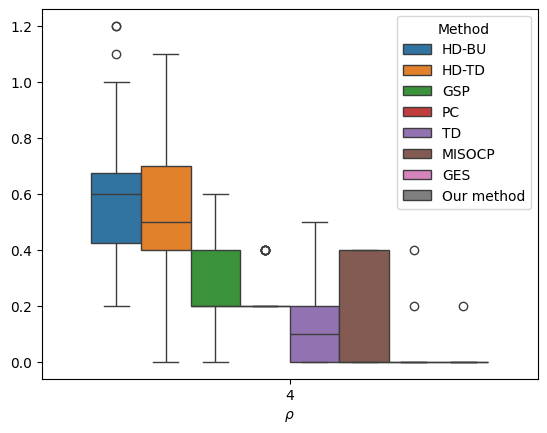

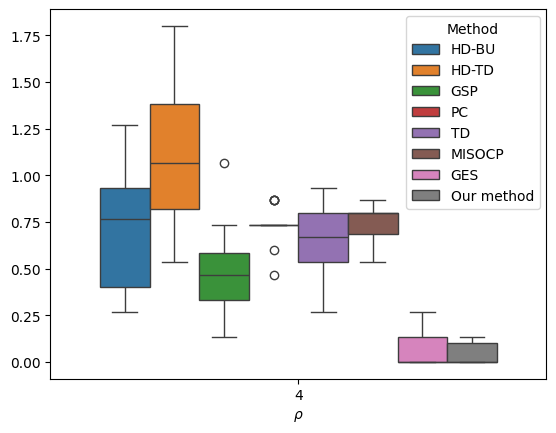

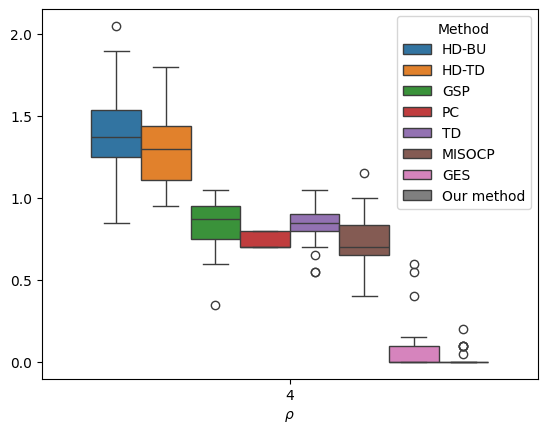

In [19]:
F6 = plt.figure()
all_cpdag_10 = all_cpdag[all_cpdag.m == 10]
sns.boxplot(x=all_cpdag_10['$\\rho$'],
            y=all_cpdag_10['d_cpdag']/all_cpdag_10['m'],
            hue=all_cpdag_10['Method'])
plt.ylabel(None)
plt.show()
F6.savefig("comparison with synthetic non-Gaussian errors/1-30/synthetic_non-gaussian_m10.pdf", bbox_inches='tight')

F7 = plt.figure()
all_cpdag_15 = all_cpdag[all_cpdag.m == 15]
sns.boxplot(x=all_cpdag_15['$\\rho$'],
            y=all_cpdag_15['d_cpdag']/all_cpdag_15['m'],
            hue=all_cpdag_15['Method'])
plt.ylabel(None)
plt.show()
F7.savefig("comparison with synthetic non-Gaussian errors/1-30/synthetic_non-gaussian_m15.pdf", bbox_inches='tight')

F8 = plt.figure()
all_cpdag_20 = all_cpdag[all_cpdag.m == 20]
sns.boxplot(x=all_cpdag_20['$\\rho$'],
            y=all_cpdag_20['d_cpdag']/all_cpdag_20['m'],
            hue=all_cpdag_20['Method'])
plt.ylabel(None)
plt.show()
F8.savefig("comparison with synthetic non-Gaussian errors/1-30/synthetic_non-gaussian_m20.pdf", bbox_inches='tight')